ic| projection_matrix: tensor([[32.,  0., 16.],
                               [ 0., 32., 16.],
                               [ 

0.,  0.,  1.]])
ic| tiles_touched: tensor([12], device='cuda:0', dtype=torch.int32)
    rect_tile_space: tensor([[2, 3, 6, 6]], device='cuda:0', dtype=torch.int32)
ic| vs_tetra: tensor([[ 11.0253,  13.3285, 464.2058]], device='cuda:0')


/home/dronelab/delaunay_rasterization
NDC: [[-0.15545847 -0.08657919 -0.03555338  0.24771018]
 [-0.0722057  -0.07553853  0.18193607 -0.08348382]
 [ 1.          1.          1.0000001   1.        ]]
cam_space: [[-72.16472    -41.083878   -16.870937   117.54449   ]
 [-33.518303   -35.844826    86.33305    -39.615097  ]
 [464.20578    474.5237     474.52417    474.52423   ]
 [  1.           1.           0.99999994   1.        ]]
Max value torch: 1.0
Max value jax: 1.0000001192092896
Mean Error: 0.00011292932322248816
Max Error: 0.04282337427139282


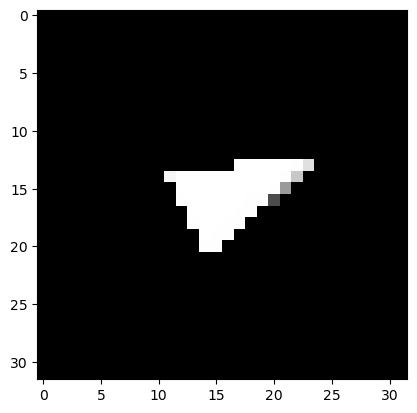

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


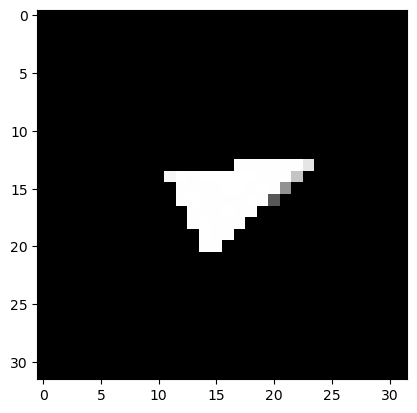

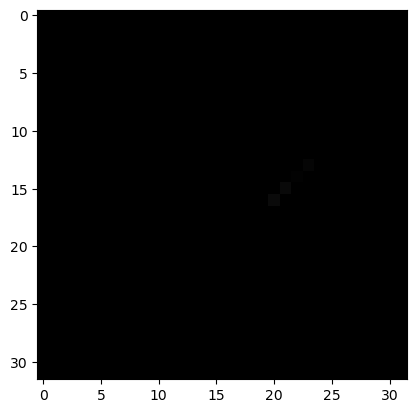

In [6]:
import os
VERSION = 9
if VERSION is not None:
    os.environ["CC"] = f"/usr/bin/gcc-{VERSION}"
    os.environ["CXX"] = f"/usr/bin/g++-{VERSION}"
from pathlib import Path
import sys
sys.path.append(str(Path(os.path.abspath('')).parent))
print(str(Path(os.path.abspath('')).parent))

from utils.compare_quad import test_tetrahedra_rendering
import torch
import matplotlib.pyplot as plt
import numpy as np

# Create sample tetrahedra
torch.manual_seed(0)
N = 4
vertices = (torch.rand((N, 3)).cuda() * 2 - 1) * 100
indices = torch.tensor([[0, 1, 2, 3]]).int().cuda()
rgbs = torch.ones(1, 4).cuda()
rgbs[:, 3] = 10


# Generate random barycentric coordinates that sum to 1
barycentric = torch.rand(4).cuda()
barycentric = barycentric / barycentric.sum()

# Use barycentric coordinates to get a point inside the tetrahedron
origin = vertices[indices[0]].T @ barycentric  # Shape: (3,)

# Update viewmat with new origin
viewmat = torch.eye(4)
viewmat[:3, 3] = origin  # Set translation to sampled point
viewmat = torch.linalg.inv(viewmat)

vertices = torch.tensor([[-95.4799, -57.6470,  90.7066],
        [-79.4274, -49.4611,  44.4854],
        [-52.4960,  64.7660,  93.9736],
        [ -6.5456,  67.9434,  75.0746]], device='cuda:0')

viewmat = torch.tensor([[-8.0029e-01, -5.9850e-01,  3.6389e-02, -9.8749e+00],
        [-4.7397e-01,  6.6861e-01,  5.7299e-01, -9.4788e+01],
        [ 3.6726e-01, -4.4131e-01,  8.1876e-01,  1.2062e+01],
        [ 1.5657e-11,  3.1469e-10, -3.5606e-10,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[-95.4799, -57.6470,  90.7066],
        [-79.4274, -49.4611,  44.4854],
        [-52.4960,  64.7660,  93.9736],
        [ -6.5456,  67.9434,  75.0746]], device='cuda:0')

viewmat = torch.tensor([[ 8.0029e-01,  5.9850e-01, -3.6389e-02,  9.8749e+00],
        [-4.7397e-01,  6.6861e-01,  5.7299e-01, -9.4788e+01],
        [-3.6726e-01,  4.4131e-01, -8.1876e-01,  8.1377e+01],
        [ 2.8744e-10,  1.2840e-09, -1.4852e-09,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[-95.4799, -57.6470,  90.7066],
        [-79.4274, -49.4611,  44.4854],
        [-52.4960,  64.7660,  93.9736],
        [ -6.5456,  67.9434,  75.0746]], device='cuda:0')

viewmat = torch.tensor([[-8.0029e-01, -5.9850e-01,  3.6389e-02, -9.8749e+00],
        [-4.7397e-01,  6.6861e-01,  5.7299e-01, -9.4788e+01],
        [ 3.6726e-01, -4.4131e-01,  8.1876e-01,  1.0456e+01],
        [-1.5892e-11, -3.3605e-10,  1.2110e-10,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[-19.4213, -43.9911,  10.9600],
        [ -7.1920, -11.4912, -22.3951],
        [  0.2528, -63.2313,  91.7116],
        [-21.5305, -24.9278,  -2.2061]], device='cuda:0')

viewmat = torch.tensor([[-8.9310e-01, -3.8516e-01, -2.3245e-01, -1.9776e+01],
        [-3.2402e-01,  1.9231e-01,  9.2630e-01, -1.1502e+01],
        [-3.1207e-01,  9.0259e-01, -2.9655e-01,  3.1655e+01],
        [-1.6578e-10, -1.5738e-09, -1.2429e-09,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[ 60.7669, -96.8483,  94.5413],
        [ 72.4854, -28.6022,  56.9964],
        [-98.5371,  54.6901,  81.6465],
        [-84.0243,  34.9694,  40.8643]], device='cuda:0')

viewmat = torch.tensor([[-9.9100e-01, -7.5307e-02, -1.1068e-01,  2.3068e+01],
        [-1.9649e-02, -7.3600e-01,  6.7669e-01, -6.7766e+01],
        [-1.3242e-01,  6.7278e-01,  7.2790e-01, -2.8973e+01],
        [ 1.7892e-10, -2.3082e-09,  8.4690e-11,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[ 94.7858, -80.0772,  55.6306],
        [-70.6131,  -6.3381, -77.7882],
        [-98.0845,  79.6445, -19.4213],
        [-43.9911,  10.9600,  -7.1920]], device='cuda:0')

viewmat = torch.tensor([[-3.7600e-01,  9.2320e-01,  7.9591e-02, -1.7302e+01],
        [ 7.4860e-01,  2.5202e-01,  6.1325e-01,  5.7143e+00],
        [-5.4610e-01, -2.9016e-01,  7.8586e-01, -8.4968e+00],
        [ 1.5103e-09, -2.2571e-09,  1.5780e-09,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[ 82.1960,  13.3321, -73.9002],
        [ 51.6542,  21.3977, -82.8467],
        [ -2.1273, -85.3505, -47.8307],
        [-99.7481,  68.3446, -75.7319]], device='cuda:0')

viewmat = torch.tensor([[-9.6038e-01,  2.7390e-01,  5.1422e-02,  6.9231e+00],
        [-2.4986e-01, -9.2799e-01,  2.7641e-01,  1.9818e+01],
        [-1.2343e-01, -2.5261e-01, -9.5966e-01,  4.0680e+02],
        [ 6.6607e-11,  4.4987e-10,  2.9898e-11,  1.0000e+00]], device='cuda:0')
vertices = torch.tensor([[ 82.1960,  13.3321, -73.9002],
        [ 51.6542,  21.3977, -82.8467],
        [ -2.1273, -85.3505, -47.8307],
        [-99.7481,  68.3446, -75.7319]], device='cuda:0')

viewmat = torch.tensor([[-9.6038e-01,  2.7390e-01,  5.1422e-02,  6.9231e+00],
        [-2.4986e-01, -9.2799e-01,  2.7641e-01,  1.9818e+01],
        [-1.2343e-01, -2.5261e-01, -9.5966e-01,  4.0680e+02],
        [ 6.6607e-11,  4.4987e-10,  2.9898e-11,  1.0000e+00]], device='cuda:0')

# Run test
results = test_tetrahedra_rendering(
    vertices.cuda(), indices, rgbs, viewmat,
    height=32, width=32, tile_size=4)
    # height=8, width=8)


print(f"Max value torch: {results['torch_image'].max()}")
print(f"Max value jax: {results['jax_image'].max()}")
print(f"Mean Error: {results['mean_error']}")
print(f"Max Error: {results['max_error']}")
plt.imshow(results['torch_image'])
plt.show()
plt.imshow(results['jax_image'][..., :3])
plt.show()
plt.imshow(np.abs(results['jax_image'][..., :3] - results['torch_image']))
plt.show()


In [2]:
from jaxutil import tetra_quad
import jax.numpy as jnp
cam_pos = jnp.linalg.inv(viewmat.cpu().numpy())[:3, 3]
print(vertices, indices)
tetra_quad.point_in_tetrahedron(vertices.cpu().numpy(), indices.cpu().numpy()[0], cam_pos)

tensor([[ 94.7858, -80.0772,  55.6306],
        [-70.6131,  -6.3381, -77.7882],
        [-98.0845,  79.6445, -19.4213],
        [-43.9911,  10.9600,  -7.1920]], device='cuda:0') tensor([[0, 1, 2, 3]], device='cuda:0', dtype=torch.int32)


Array(False, dtype=bool)

In [3]:

print(vertices, viewmat)
print(viewmat @ torch.cat([vertices.T, torch.ones_like(vertices.T[:1, :])], dim=0))

tensor([[ 94.7858, -80.0772,  55.6306],
        [-70.6131,  -6.3381, -77.7882],
        [-98.0845,  79.6445, -19.4213],
        [-43.9911,  10.9600,  -7.1920]], device='cuda:0') tensor([[-3.7600e-01,  9.2320e-01,  7.9591e-02, -1.7302e+01],
        [ 7.4860e-01,  2.5202e-01,  6.1325e-01,  5.7143e+00],
        [-5.4610e-01, -2.9016e-01,  7.8586e-01, -8.4968e+00],
        [ 1.5103e-09, -2.2571e-09,  1.5780e-09,  1.0000e+00]], device='cuda:0')
tensor([[-122.4410,   -2.7941,   91.5598,    8.7845],
        [  90.6054,  -96.4476,  -59.5499,  -28.8658],
        [   6.6937,  -29.2266,    6.6951,    6.6947],
        [   1.0000,    1.0000,    1.0000,    1.0000]], device='cuda:0')


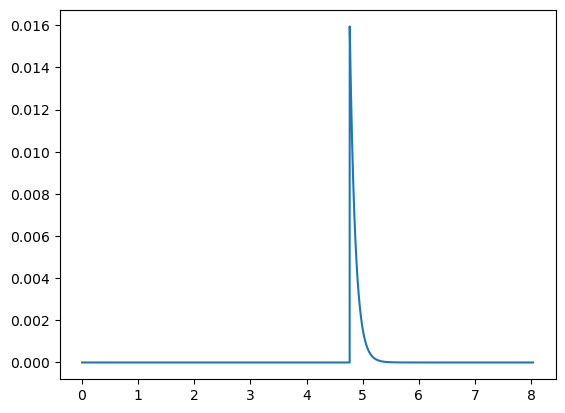

[1.6071403e-03 3.2142806e-03 4.8214206e-03 ... 8.0308800e+00 8.0324869e+00
 8.0340939e+00]


In [4]:

i, j = 0, 0
plt.plot(results['extras']['tdist'][i, j][1:], results['extras']['weights'][i, j][0])
plt.show()
print(results['extras']['tdist'][i, j][1:])